## Machine Learning Techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('kc_house_data.csv')

#### Reading the data

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploratory Data Analysis

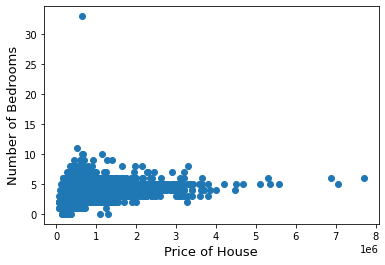

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = data['price'], y = data['bedrooms'])
plt.ylabel('Number of Bedrooms', fontsize=13)
plt.xlabel('Price of House', fontsize=13)
plt.show()

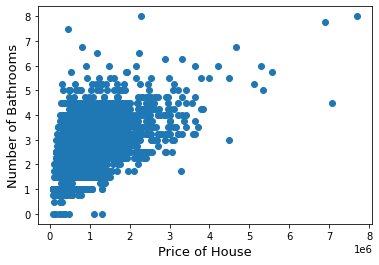

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = data['price'], y = data['bathrooms'])
plt.ylabel('Number of Bathrooms', fontsize=13)
plt.xlabel('Price of House', fontsize=13)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['price'], y = data['bedrooms'])
plt.ylabel('Number of Bedrooms', fontsize=13)
plt.xlabel('Price of House', fontsize=13)
plt.show()

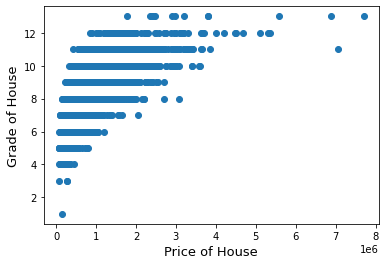

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = data['price'], y = data['grade'])
plt.ylabel('Grade of House', fontsize=13)
plt.xlabel('Price of House', fontsize=13)
plt.show()

### Data Preprocessing

#### Finding and Handling Outliers

#### The following columns are categorical datas: bedrooms, bathrooms, floor, waterfront, view, condition, grade and "yr_renovated"
#### We will also need to update the categories for "yr_renovated"

##### Dropping the following columns because they are irrelevant: 'id', 'date' and 'zipcode'

In [13]:
data = data.drop(['id','date','zipcode'], axis=1)

##### Adding a new column 'renovated' which will tell whether the house was renovated or not. Also, deleting the 'yr_renovated' column as it is not required now

In [14]:
data['renovated'] = np.where(data['yr_renovated'] != 0, 1, 0)
data = data.drop(['yr_renovated'], axis=1)

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0


In [17]:
## Finding the number of flats with different number of bedrooms
data.groupby('bedrooms')[['bedrooms']].count()

,bedrooms
bedrooms,
0,13
1,199
2,2760
3,9824
4,6882
5,1601
6,272
7,38
8,13


##### From the above data the following can be inferred:
From the above data it can be seen that the bedrooms data above 7 and below 1 can be dropped as these values are too less to be considered for data modelling.

In [18]:
### Checking for outliers in bedrooms feature
data[(data['bedrooms']>7) | (data['bedrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
875,1100000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,47.6362,-122.322,2360,4000,0
1660,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,47.6086,-122.303,1800,2580,0
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,47.7145,-122.356,1470,1399,0
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,47.7222,-122.290,1430,1650,0
4035,2150000.0,8,6.00,4340,9415,2.0,0,0,3,8,4340,0,1967,47.6316,-122.202,2050,9100,0
4067,373000.0,8,3.00,2850,12714,1.0,0,0,3,7,2850,0,1959,47.4859,-122.205,1480,4942,0
4096,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,47.6927,-122.338,1460,6291,0
4235,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,47.6374,-122.324,1960,2450,0
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,47.5260,-122.261,2170,6000,0
6079,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,47.6604,-122.289,2510,5000,1


In [19]:
## Now we will remove these rows
data = data.drop(data[(data['bedrooms']>7) | (data['bedrooms']==0)].index)

In [20]:
data['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6, 7], dtype=int64)

In [22]:
## Grade with values in (1,3,13) will need to be removed
data.groupby('grade')[['grade']].count()

,grade
grade,
3,3
4,27
5,242
6,2038
7,8961
8,6060
9,2613
10,1133
11,398


In [23]:
## We will need to remove rows where bathroom is below 0.75 and above 4.50 because considering the output from 
## description of data, there are very less values for these number of bathrooms

data.groupby('bathrooms')[['bathrooms']].count()

,bathrooms
bathrooms,
0.00,3
0.50,4
0.75,71
1.00,3851
1.25,9
1.50,1445
1.75,3047
2.00,1929
2.25,2047


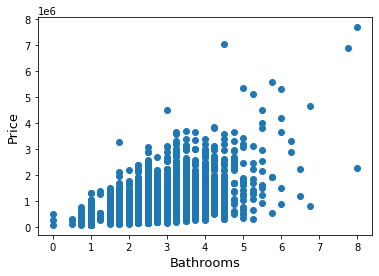

In [24]:
### 

fig, ax = plt.subplots()
ax.scatter(x = data['bathrooms'], y = data['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bathrooms', fontsize=13)
plt.show()

In [25]:
data = data.drop(data[(data['bathrooms']<0.75) | (data['bathrooms']>5.00)].index)

In [26]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
count,2.152900e+04,21529.000000,21529.000000,21529.000000,2.152900e+04,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000
mean,5.359895e+05,3.363185,2.107483,2070.013052,1.498137e+04,1.492986,0.007385,0.232059,3.410284,7.651168,1781.022621,288.990432,1970.989549,47.559955,-122.214023,1983.781690,12687.871847,0.042083
std,3.476041e+05,0.884160,0.749242,889.804283,4.083567e+04,0.539457,0.085622,0.762016,0.650764,1.161685,809.982170,436.619267,29.357462,0.138658,0.140745,681.039609,26599.695565,0.200783
min,7.800000e+04,1.000000,0.750000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.470400,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.611000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571700,-122.231000,1840.000000,7620.000000,0.000000
75%,6.410000e+05,4.000000,2.500000,2540.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,47.678100,-122.125000,2360.000000,10078.000000,0.000000
max,7.060000e+06,7.000000,5.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,3500.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0


In [28]:
### Creating a variable and assigning our dataframe to it

In [29]:
X = data.copy()

In [30]:
X.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0


#### Creating the target variable y 
#### Price is our target variable

In [31]:
y = data['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21529, dtype: float64

###### Dropping the 'price' column to create X which is our feature variable

In [32]:
X = X.drop(['price'], axis =1)

In [33]:
X.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

#### One hot encoding for converting categorical into numerical

In [34]:
X_1=pd.get_dummies(X,columns=['bedrooms','bathrooms','waterfront','floors','grade','view','condition','renovated'])

In [35]:
X_1

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,bedrooms_1,...,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,renovated_0,renovated_1
0,1180,5650,1180,0,1955,47.5112,-122.257,1340,5650,0,...,0,0,0,0,0,1,0,0,1,0
1,2570,7242,2170,400,1951,47.7210,-122.319,1690,7639,0,...,0,0,0,0,0,1,0,0,0,1
2,770,10000,770,0,1933,47.7379,-122.233,2720,8062,0,...,0,0,0,0,0,1,0,0,1,0
3,1960,5000,1050,910,1965,47.5208,-122.393,1360,5000,0,...,0,0,0,0,0,0,0,1,1,0
4,1680,8080,1680,0,1987,47.6168,-122.045,1800,7503,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,1530,0,2009,47.6993,-122.346,1530,1509,0,...,0,0,0,0,0,1,0,0,1,0
21609,2310,5813,2310,0,2014,47.5107,-122.362,1830,7200,0,...,0,0,0,0,0,1,0,0,1,0
21610,1020,1350,1020,0,2009,47.5944,-122.299,1020,2007,0,...,0,0,0,0,0,1,0,0,1,0
21611,1600,2388,1600,0,2004,47.5345,-122.069,1410,1287,0,...,0,0,0,0,0,1,0,0,1,0


In [36]:
X_1.shape

(21529, 65)

In [37]:
import statsmodels.api as sm

X_1=sm.add_constant(X_1)
X_1

,const,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,...,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,renovated_0,renovated_1
0,1.0,1180,5650,1180,0,1955,47.5112,-122.257,1340,5650,...,0,0,0,0,0,1,0,0,1,0
1,1.0,2570,7242,2170,400,1951,47.7210,-122.319,1690,7639,...,0,0,0,0,0,1,0,0,0,1
2,1.0,770,10000,770,0,1933,47.7379,-122.233,2720,8062,...,0,0,0,0,0,1,0,0,1,0
3,1.0,1960,5000,1050,910,1965,47.5208,-122.393,1360,5000,...,0,0,0,0,0,0,0,1,1,0
4,1.0,1680,8080,1680,0,1987,47.6168,-122.045,1800,7503,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,1131,1530,0,2009,47.6993,-122.346,1530,1509,...,0,0,0,0,0,1,0,0,1,0
21609,1.0,2310,5813,2310,0,2014,47.5107,-122.362,1830,7200,...,0,0,0,0,0,1,0,0,1,0
21610,1.0,1020,1350,1020,0,2009,47.5944,-122.299,1020,2007,...,0,0,0,0,0,1,0,0,1,0
21611,1.0,1600,2388,1600,0,2004,47.5345,-122.069,1410,1287,...,0,0,0,0,0,1,0,0,1,0


In [38]:
X_1.describe()

,const,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,...,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,renovated_0,renovated_1
count,21529.0,21529.000000,2.152900e+04,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,...,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000
mean,1.0,2070.013052,1.498137e+04,1781.022621,288.990432,1970.989549,47.559955,-122.214023,1983.781690,12687.871847,...,0.044312,0.023503,0.014399,0.001347,0.007896,0.648706,0.263226,0.078824,0.957917,0.042083
std,0.0,889.804283,4.083567e+04,809.982170,436.619267,29.357462,0.138658,0.140745,681.039609,26599.695565,...,0.205793,0.151499,0.119132,0.036678,0.088512,0.477386,0.440394,0.269470,0.200783,0.200783
min,1.0,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1420.000000,5.040000e+03,1190.000000,0.000000,1951.000000,47.470400,-122.328000,1490.000000,5100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,1910.000000,7.611000e+03,1560.000000,0.000000,1975.000000,47.571700,-122.231000,1840.000000,7620.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,2540.000000,1.065000e+04,2200.000000,560.000000,1997.000000,47.678100,-122.125000,2360.000000,10078.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,10040.000000,1.651359e+06,7880.000000,3500.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train Test Split to split the data into training and testing set

In [39]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1, y, test_size=0.2, random_state=100)

In [40]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((17223, 66), (4306, 66), (17223,), (4306,))

### Building the Model

In [41]:
mlr_1=sm.OLS(y_train_1,X_train_1)

In [42]:
# Fitting 
mlr_1=mlr_1.fit()

In [43]:
mlr_1.params

const           -1.126278e+07
sqft_living      7.619692e+01
sqft_lot         1.215305e-01
sqft_above       3.728260e+01
sqft_basement    3.892402e+01
                     ...     
condition_3     -2.267249e+06
condition_4     -2.226599e+06
condition_5     -2.181012e+06
renovated_0     -5.664234e+06
renovated_1     -5.598544e+06
Length: 66, dtype: float64

#### Diagnosis of the Model

In [44]:
mlr_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.730      
Dependent Variable:        price                  AIC:                      465993.5309
Date:                      2022-11-10 21:41       BIC:                      466435.5090
No. Observations:          17223                  Log-Likelihood:           -2.3294e+05
Df Model:                  56                     F-statistic:              832.0      
Df Residuals:              17166                  Prob (F-statistic):       0.00       
R-squared:                 0.731                  Scale:                    3.2852e+10 
---------------------------------------------------------------------------------------
                   Coef.        Std.Err.     t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
const          -11262778.9317 577796.8522 -19.4926 0.0000 -12395319.8071 -10130238.0563
sqft_living           76.1969      2.4206  31.4786 0.0000        71.4523        80.9415
sqft_lot               0.1215      0.0461   2.6385 0.0083         0.0312         0.2118
sqft_above            37.2826      2.4772  15.0503 0.0000        32.4270        42.1382
sqft_basement         38.9240      2.7565  14.1207 0.0000        33.5210        44.3271
yr_built           -1767.2313     82.2364 -21.4896 0.0000     -1928.4231     -1606.0395
lat               564486.8418  10703.6505  52.7378 0.0000    543506.5930    585467.0907
long              -79773.7992  12304.8982  -6.4831 0.0000   -103892.6570    -55654.9413
sqft_living15         46.1073      3.5842  12.8639 0.0000        39.0819        53.1328
sqft_lot15            -0.3646      0.0729  -5.0034 0.0000        -0.5074        -0.2218
bedrooms_1      -1583871.4875  83972.3413 -18.8618 0.0000  -1748465.8576  -1419277.1173
bedrooms_2      -1582621.8250  83032.5180 -19.0603 0.0000  -1745374.0453  -1419869.6047
bedrooms_3      -1597184.5730  82635.8879 -19.3280 0.0000  -1759159.3578  -1435209.7881
bedrooms_4      -1617891.9093  82657.3111 -19.5735 0.0000  -1779908.6858  -1455875.1327
bedrooms_5      -1619884.7439  82750.5408 -19.5755 0.0000  -1782084.2600  -1457685.2277
bedrooms_6      -1679580.6105  83397.9545 -20.1394 0.0000  -1843049.1237  -1516112.0973
bedrooms_7      -1581743.7828  88344.6819 -17.9042 0.0000  -1754908.3872  -1408579.1784
bathrooms_0.75   -805122.7338  41258.2145 -19.5142 0.0000   -885993.0505   -724252.4171
bathrooms_1.0    -743253.7117  32828.7981 -22.6403 0.0000   -807601.5107   -678905.9126
bathrooms_1.25   -735864.3967  65713.2858 -11.1981 0.0000   -864669.1521   -607059.6413
bathrooms_1.5    -733419.0754  32912.1977 -22.2841 0.0000   -797930.3462   -668907.8045
bathrooms_1.75   -735655.6009  32655.7093 -22.5276 0.0000   -799664.1282   -671647.0736
bathrooms_2.0    -728776.3239  32728.5013 -22.2673 0.0000   -792927.5310   -664625.1169
bathrooms_2.25   -716644.7133  32694.9836 -21.9191 0.0000   -780730.2222   -652559.2043
bathrooms_2.5    -728391.3039  32468.8246 -22.4336 0.0000   -792033.5181   -664749.0898
bathrooms_2.75   -724908.0206  32983.0057 -21.9782 0.0000   -789558.0823   -660257.9590
bathrooms_3.0    -686971.6854  33453.7830 -20.5349 0.0000   -752544.5188   -621398.8521
bathrooms_3.25   -629925.3218  33728.1279 -18.6766 0.0000   -696035.8992   -563814.7444
bathrooms_3.5    -681387.1374  33634.3095 -20.2587 0.0000   -747313.8212   -615460.4537
bathrooms_3.75   -551408.7041  36491.4961 -15.1106 0.0000   -622935.7656   -479881.6426
bathrooms_4.0    -570625.2560  37004.3807 -15.4205 0.0000   -643157.6236   -498092.8884
bathrooms_4.25   -468931.3757  39231.4395 -11.9529 0.0000   -545829.0062   -392033.7452
bathrooms_4.5    -565257.0227  38331.8995 -14.7464 0.0000   -640391.4630   -490122.5825
bathrooms_4.75   -1

## Multicollinearity and VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def var_inf_factor(data):
    vif=pd.DataFrame()
    vif['Feature']=data.columns
    vif['VIF_Value']=[variance_inflation_factor(data.values,i) 
                        for i in range(data.shape[1])]
    print(vif)

In [47]:
pd.set_option('display.max_rows',100)
var_inf_factor(X_1)

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           Feature  VIF_Value
0            const   0.000000
1      sqft_living        inf
2         sqft_lot   2.064956
3       sqft_above        inf
4    sqft_basement        inf
5         yr_built   3.056094
6              lat   1.157713
7             long   1.552769
8    sqft_living15   3.138862
9       sqft_lot15   2.105558
10      bedrooms_1        inf
11      bedrooms_2        inf
12      bedrooms_3        inf
13      bedrooms_4        inf
14      bedrooms_5        inf
15      bedrooms_6        inf
16      bedrooms_7        inf
17  bathrooms_0.75        inf
18   bathrooms_1.0        inf
19  bathrooms_1.25        inf
20   bathrooms_1.5        inf
21  bathrooms_1.75        inf
22   bathrooms_2.0        inf
23  bathrooms_2.25        inf
24   bathrooms_2.5        inf
25  bathrooms_2.75        inf
26   bathrooms_3.0        inf
27  bathrooms_3.25        inf
28   bathrooms_3.5        inf
29  bathrooms_3.75        inf
30   bathrooms_4.0        inf
31  bathrooms_4.25        inf
32   bathr

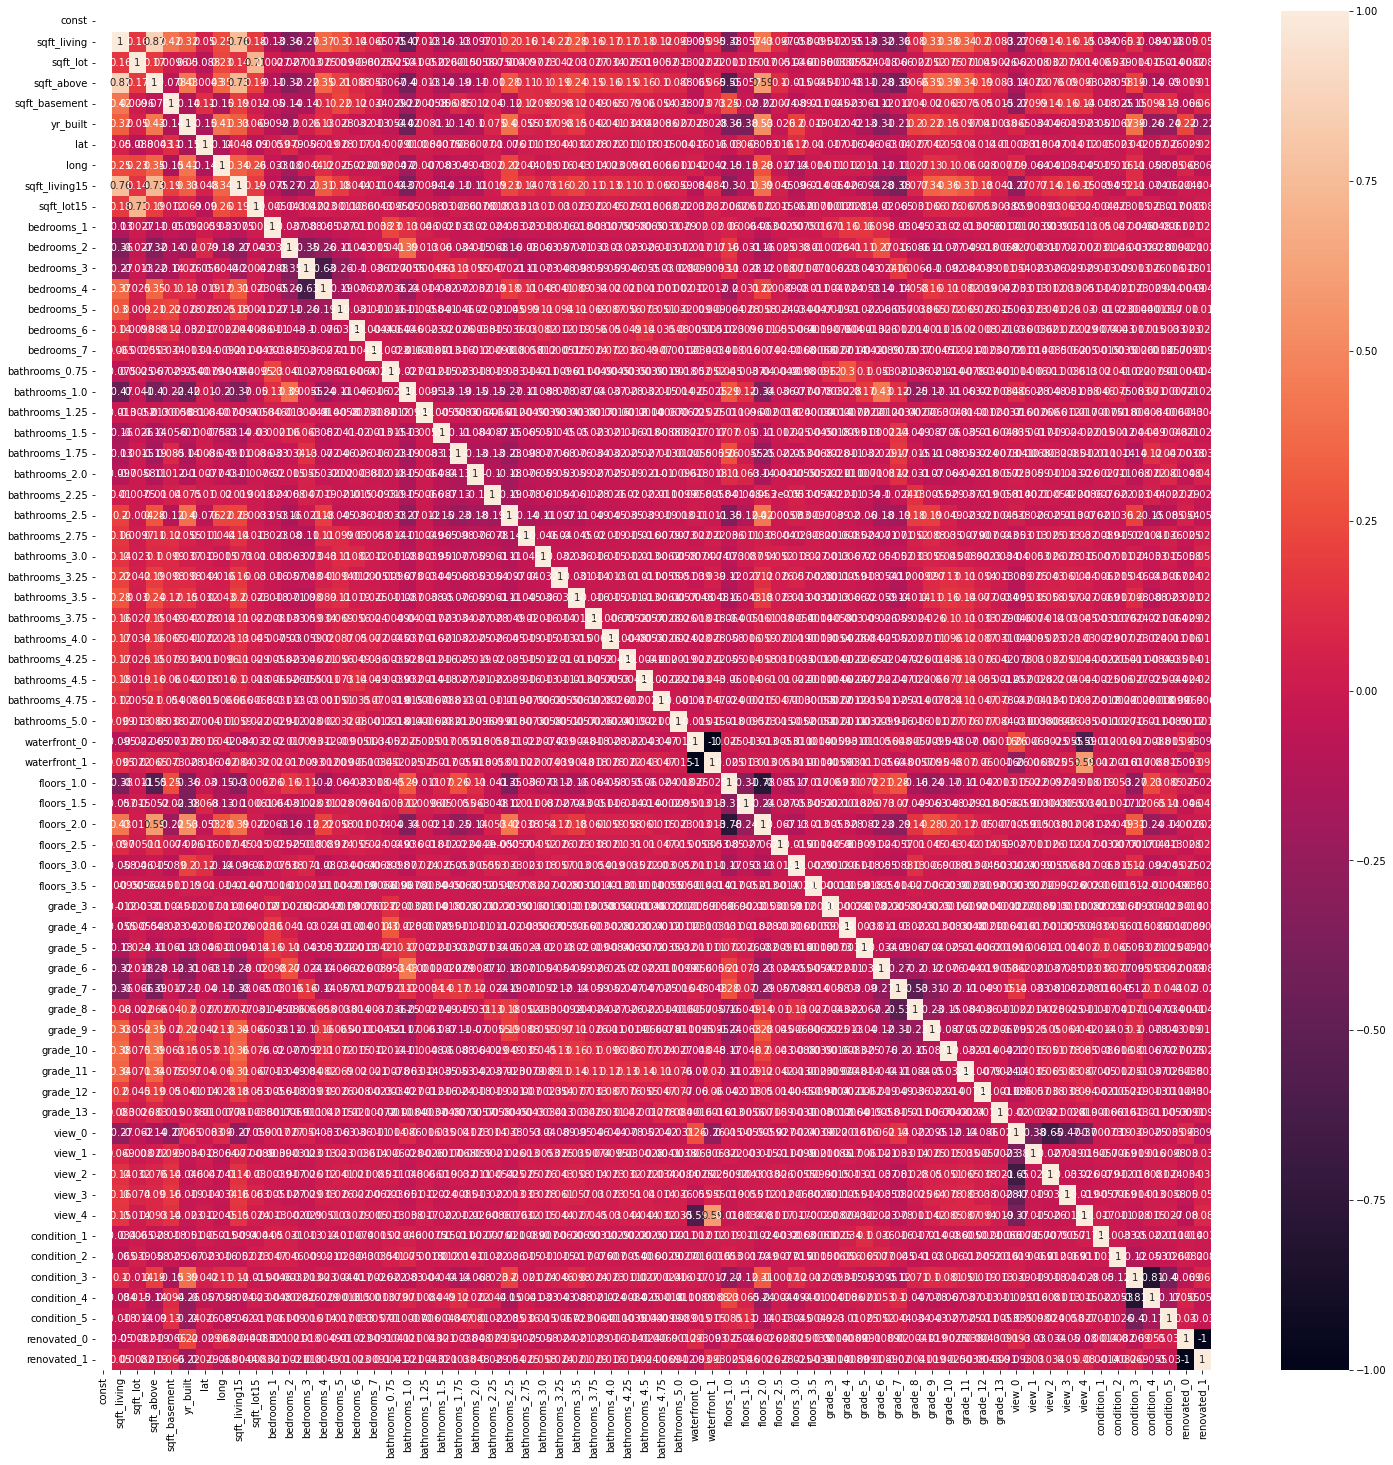

In [48]:
plt.figure(figsize=(25,25))
sns.heatmap(X_1.corr(),annot=True);

In [49]:
X_2 = X_1.copy()

In [50]:
X_2 = X_2.drop(['grade_13'], axis = 1)

In [51]:
X_2

,const,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,...,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,renovated_0,renovated_1
0,1.0,1180,5650,1180,0,1955,47.5112,-122.257,1340,5650,...,0,0,0,0,0,1,0,0,1,0
1,1.0,2570,7242,2170,400,1951,47.7210,-122.319,1690,7639,...,0,0,0,0,0,1,0,0,0,1
2,1.0,770,10000,770,0,1933,47.7379,-122.233,2720,8062,...,0,0,0,0,0,1,0,0,1,0
3,1.0,1960,5000,1050,910,1965,47.5208,-122.393,1360,5000,...,0,0,0,0,0,0,0,1,1,0
4,1.0,1680,8080,1680,0,1987,47.6168,-122.045,1800,7503,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,1530,1131,1530,0,2009,47.6993,-122.346,1530,1509,...,0,0,0,0,0,1,0,0,1,0
21609,1.0,2310,5813,2310,0,2014,47.5107,-122.362,1830,7200,...,0,0,0,0,0,1,0,0,1,0
21610,1.0,1020,1350,1020,0,2009,47.5944,-122.299,1020,2007,...,0,0,0,0,0,1,0,0,1,0
21611,1.0,1600,2388,1600,0,2004,47.5345,-122.069,1410,1287,...,0,0,0,0,0,1,0,0,1,0


#### Reiterating the model

In [52]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_2, y, test_size=0.2, random_state=100)

In [53]:
mlr_2=sm.OLS(y_train_2,X_train_2)

In [54]:
mlr_2=mlr_2.fit()

In [55]:
mlr_2.params

const            -1.127429e+07
sqft_living       7.618772e+01
sqft_lot          1.215305e-01
sqft_above        3.729179e+01
sqft_basement     3.893322e+01
yr_built         -1.767231e+03
lat               5.644868e+05
long             -7.977380e+04
sqft_living15     4.610732e+01
sqft_lot15       -3.645757e-01
bedrooms_1       -1.585516e+06
bedrooms_2       -1.584267e+06
bedrooms_3       -1.598830e+06
bedrooms_4       -1.619537e+06
bedrooms_5       -1.621530e+06
bedrooms_6       -1.681226e+06
bedrooms_7       -1.583389e+06
bathrooms_0.75   -8.057624e+05
bathrooms_1.0    -7.438934e+05
bathrooms_1.25   -7.365041e+05
bathrooms_1.5    -7.340588e+05
bathrooms_1.75   -7.362953e+05
bathrooms_2.0    -7.294160e+05
bathrooms_2.25   -7.172844e+05
bathrooms_2.5    -7.290310e+05
bathrooms_2.75   -7.255477e+05
bathrooms_3.0    -6.876114e+05
bathrooms_3.25   -6.305650e+05
bathrooms_3.5    -6.820268e+05
bathrooms_3.75   -5.520484e+05
bathrooms_4.0    -5.712650e+05
bathrooms_4.25   -4.695711e+05
bathroom

In [56]:
mlr_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.730      
Dependent Variable:        price                  AIC:                      465993.5309
Date:                      2022-11-10 21:41       BIC:                      466435.5090
No. Observations:          17223                  Log-Likelihood:           -2.3294e+05
Df Model:                  56                     F-statistic:              832.0      
Df Residuals:              17166                  Prob (F-statistic):       0.00       
R-squared:                 0.731                  Scale:                    3.2852e+10 
---------------------------------------------------------------------------------------
                   Coef.        Std.Err.     t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
const          -11274293.4953 598468.1213 -18.8386 0.0000 -12447352.1706 -10101234.8200
sqft_living           76.1877      2.4206  31.4749 0.0000        71.4431        80.9323
sqft_lot               0.1215      0.0461   2.6385 0.0083         0.0312         0.2118
sqft_above            37.2918      2.4773  15.0535 0.0000        32.4361        42.1475
sqft_basement         38.9332      2.7564  14.1244 0.0000        33.5303        44.3361
yr_built           -1767.2313     82.2364 -21.4896 0.0000     -1928.4231     -1606.0395
lat               564486.8417  10703.6505  52.7378 0.0000    543506.5929    585467.0906
long              -79773.7990  12304.8982  -6.4831 0.0000   -103892.6568    -55654.9411
sqft_living15         46.1073      3.5842  12.8639 0.0000        39.0819        53.1328
sqft_lot15            -0.3646      0.0729  -5.0034 0.0000        -0.5074        -0.2218
bedrooms_1      -1585516.4251  86881.3809 -18.2492 0.0000  -1755812.8101  -1415220.0401
bedrooms_2      -1584266.7626  85962.5849 -18.4297 0.0000  -1752762.2136  -1415771.3117
bedrooms_3      -1598829.5106  85571.6801 -18.6841 0.0000  -1766558.7481  -1431100.2731
bedrooms_4      -1619536.8469  85597.8473 -18.9203 0.0000  -1787317.3749  -1451756.3189
bedrooms_5      -1621529.6815  85691.8750 -18.9228 0.0000  -1789494.5133  -1453564.8497
bedrooms_6      -1681225.5481  86320.0602 -19.4766 0.0000  -1850421.6872  -1512029.4091
bedrooms_7      -1583388.7204  91138.2962 -17.3735 0.0000  -1762029.0943  -1404748.3465
bathrooms_0.75   -805762.4318  42196.2198 -19.0956 0.0000   -888471.3346   -723053.5290
bathrooms_1.0    -743893.4096  33952.5686 -21.9098 0.0000   -810443.9138   -677342.9055
bathrooms_1.25   -736504.0946  66277.8755 -11.1124 0.0000   -866415.5036   -606592.6857
bathrooms_1.5    -734058.7733  34034.7596 -21.5679 0.0000   -800770.3802   -667347.1665
bathrooms_1.75   -736295.2988  33787.2370 -21.7921 0.0000   -802521.7361   -670068.8616
bathrooms_2.0    -729416.0219  33857.7620 -21.5435 0.0000   -795780.6954   -663051.3484
bathrooms_2.25   -717284.4113  33827.0617 -21.2045 0.0000   -783588.9091   -650979.9134
bathrooms_2.5    -729031.0019  33608.4968 -21.6919 0.0000   -794907.0900   -663154.9138
bathrooms_2.75   -725547.7186  34112.7054 -21.2691 0.0000   -792412.1072   -658683.3301
bathrooms_3.0    -687611.3834  34576.9949 -19.8864 0.0000   -755385.8269   -619836.9399
bathrooms_3.25   -630565.0198  34839.3495 -18.0992 0.0000   -698853.7050   -562276.3345
bathrooms_3.5    -682026.8354  34756.6392 -19.6229 0.0000   -750153.4000   -613900.2707
bathrooms_3.75   -552048.4021  37514.5025 -14.7156 0.0000   -625580.6605   -478516.1436
bathrooms_4.0    -571264.9540  38009.5118 -15.0295 0.0000   -645767.4814   -496762.4266
bathrooms_4.25   -469571.0737  40177.8394 -11.6873 0.0000   -548323.7447   -390818.4026
bathrooms_4.5    -565896.7207  39331.6967 -14.3878 0.0000   -642990.8656   -488802.5758
bathrooms_4.75   -1

In [57]:
pd.set_option('display.max_rows',100)
var_inf_factor(X_2)

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           Feature   VIF_Value
0            const    0.000000
1      sqft_living         inf
2         sqft_lot    2.064956
3       sqft_above         inf
4    sqft_basement         inf
5         yr_built    3.056094
6              lat    1.157713
7             long    1.552769
8    sqft_living15    3.138862
9       sqft_lot15    2.105558
10      bedrooms_1         inf
11      bedrooms_2         inf
12      bedrooms_3         inf
13      bedrooms_4         inf
14      bedrooms_5         inf
15      bedrooms_6         inf
16      bedrooms_7         inf
17  bathrooms_0.75         inf
18   bathrooms_1.0         inf
19  bathrooms_1.25         inf
20   bathrooms_1.5         inf
21  bathrooms_1.75         inf
22   bathrooms_2.0         inf
23  bathrooms_2.25         inf
24   bathrooms_2.5         inf
25  bathrooms_2.75         inf
26   bathrooms_3.0         inf
27  bathrooms_3.25         inf
28   bathrooms_3.5         inf
29  bathrooms_3.75         inf
30   bathrooms_4.0         inf
31  bath

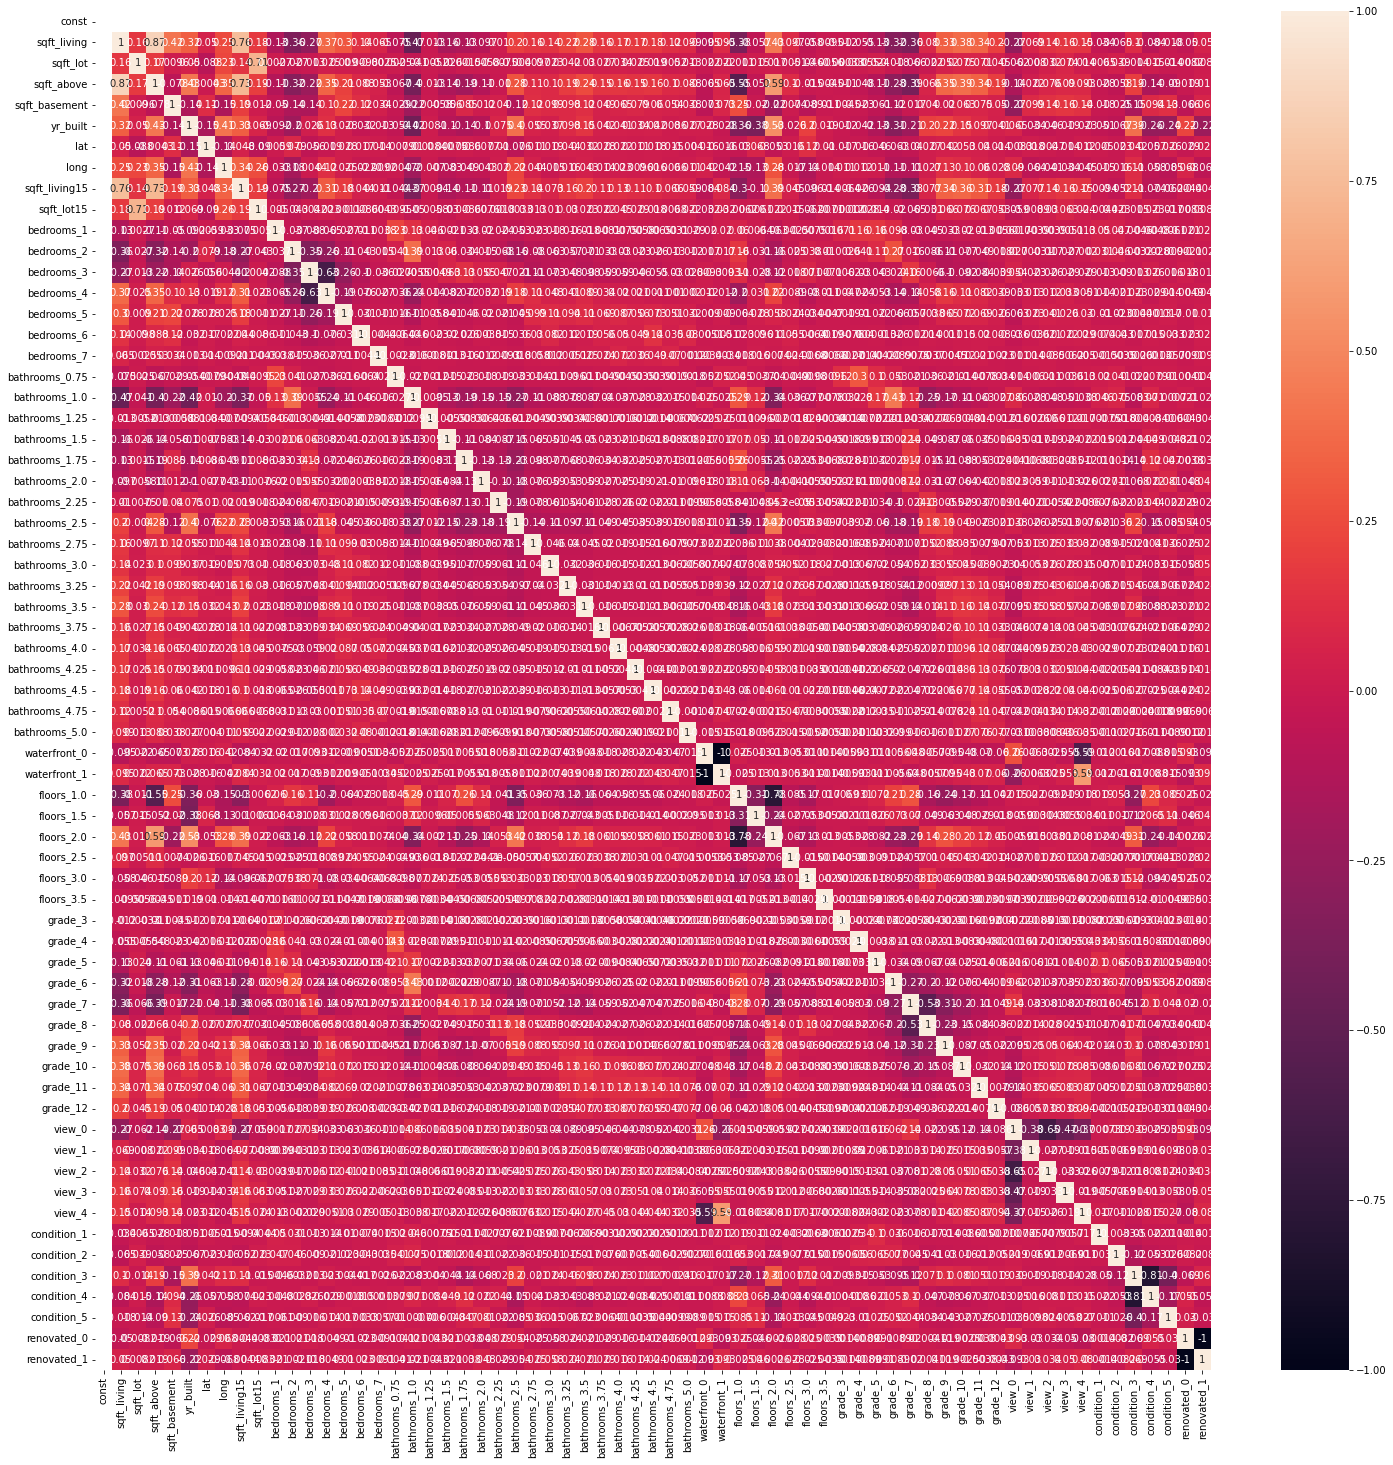

In [58]:
plt.figure(figsize=(25,25))
sns.heatmap(X_2.corr(),annot=True);

#### It can be seen that none of the attributes have p-value >0.05 and VIF value is also less than 4. At the same time the absolute value of correlation between variables is less than 7. So, we move further

In [59]:
y_pred=mlr_2.predict(X_test_2)
y_pred

3577     3.279214e+05
8996     6.635431e+05
7023     8.179110e+05
10046    2.791875e+05
18519    1.216462e+06
             ...     
1457     2.867790e+05
1146     4.313202e+05
3144     4.438122e+05
16577    4.457429e+05
12521    4.564182e+05
Length: 4306, dtype: float64

#### NOTE:  As none of the variables have p val >0.05 and no correlationship was found between features with VIF value > 4 We check for RMSE value

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

r2=r2_score(y_test_2,y_pred)
print('R2',r2)


#mean sq error and root mse
mse=mean_squared_error(y_test_2,y_pred)
rmse=np.sqrt(mse)
print("RMSE:",rmse)

R2 0.705010861304946
RMSE: 186285.3406851089


#### Since our RMSE score is large, we will try to reduce it by using the square root, cube root or logarithm method. 

#### All other methods are performed in other jupyter file